/ddrive/ottstreamer/webapp/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/ddrive/ottstreamer/webapp/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/ddrive/ottstreamer/webapp/venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


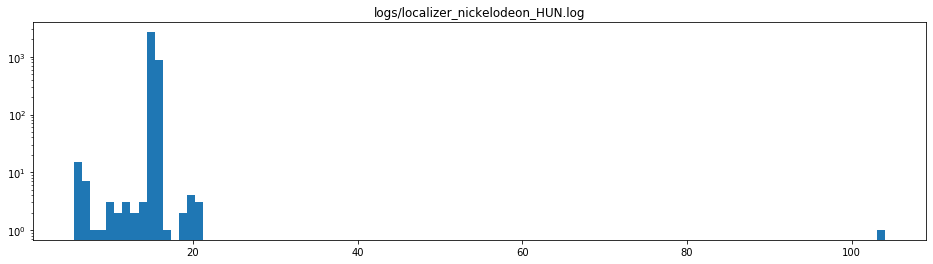

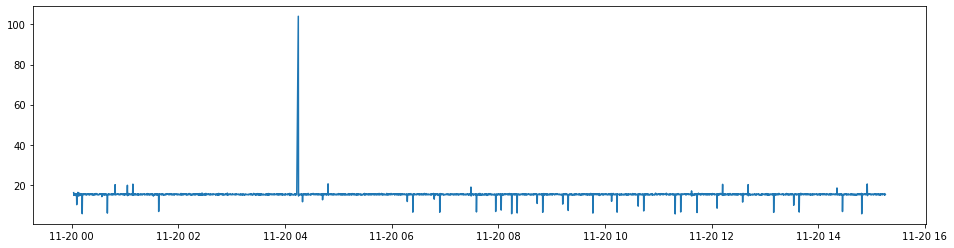

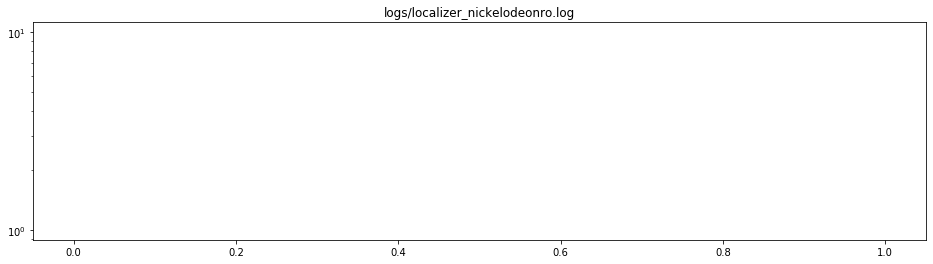

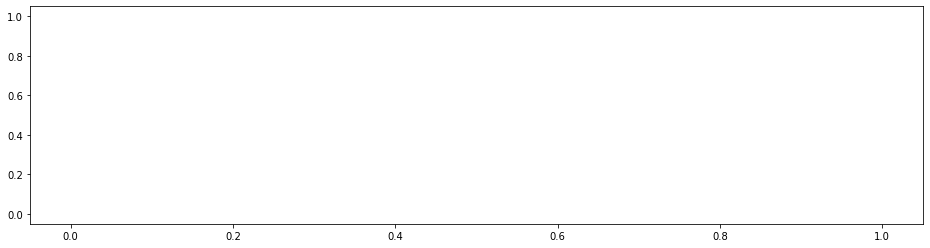

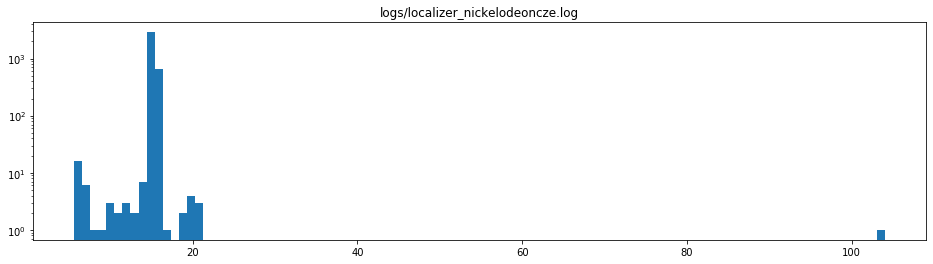

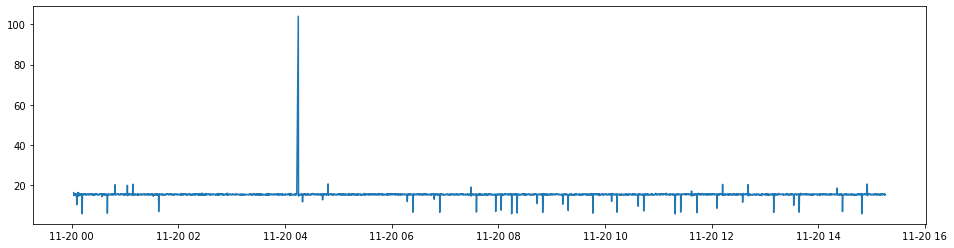

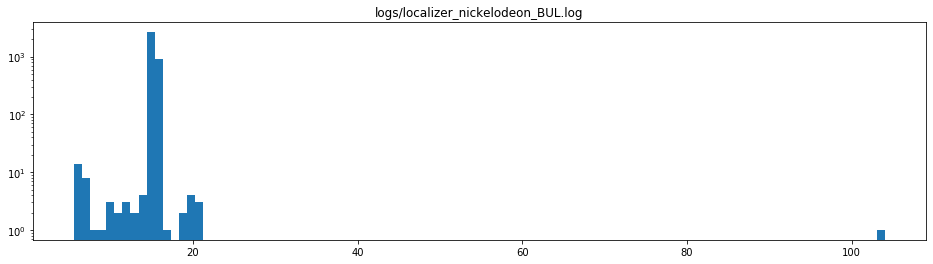

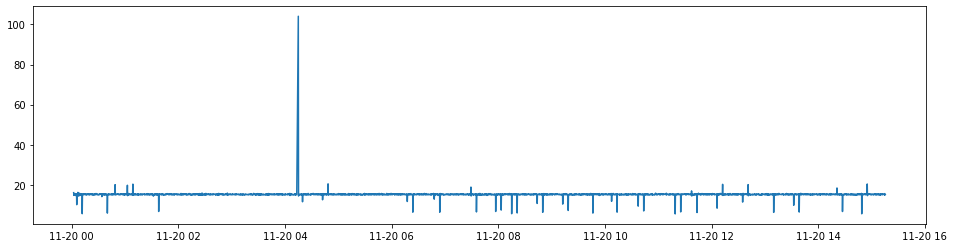

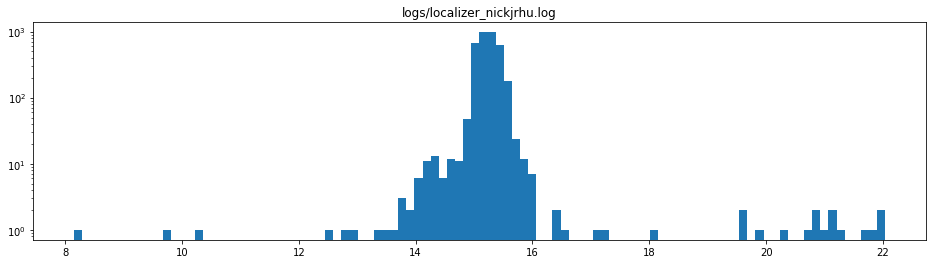

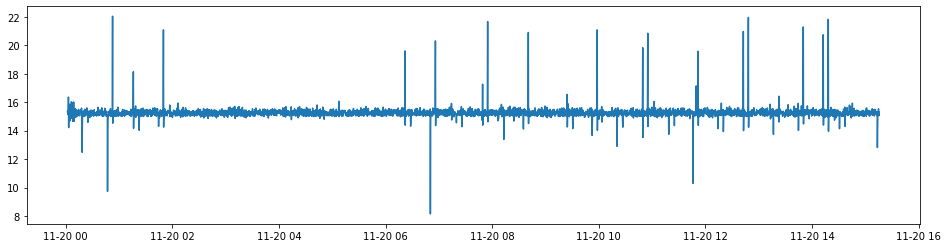

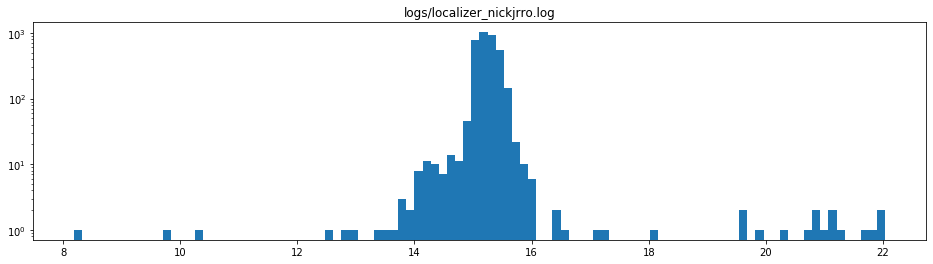

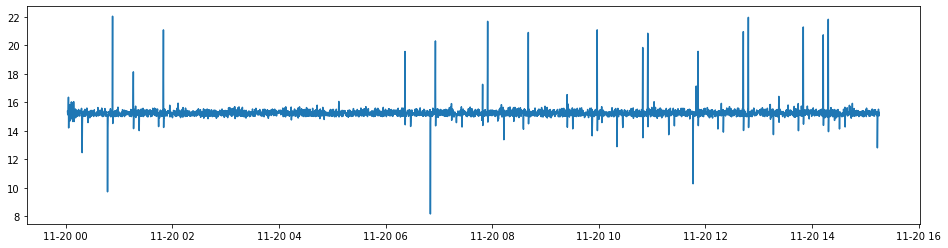

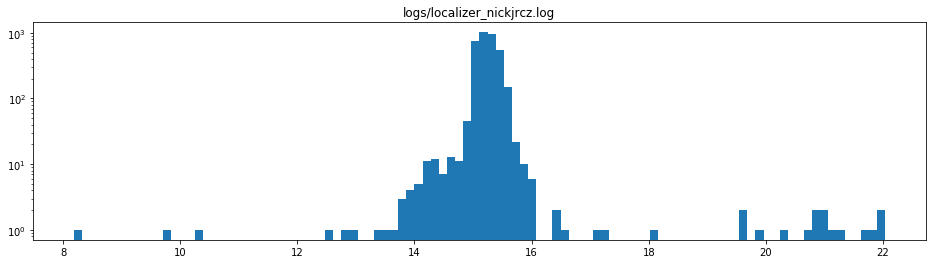

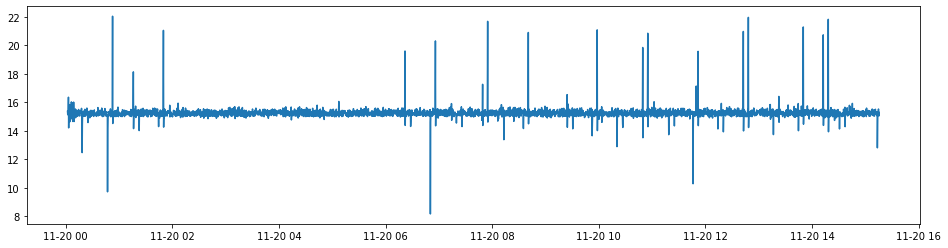

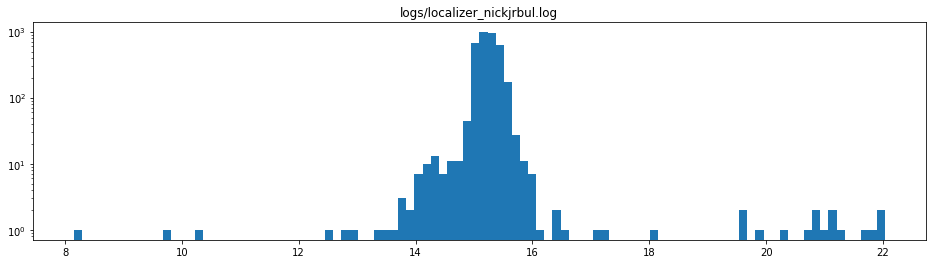

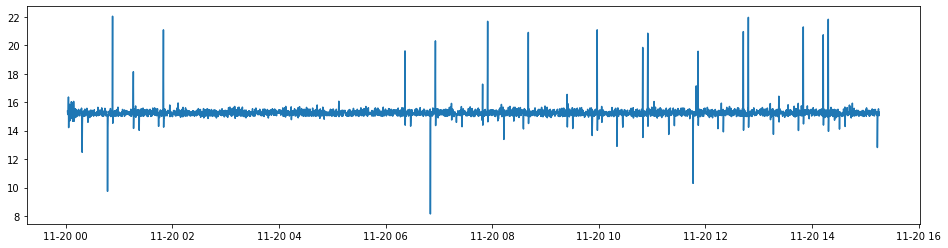

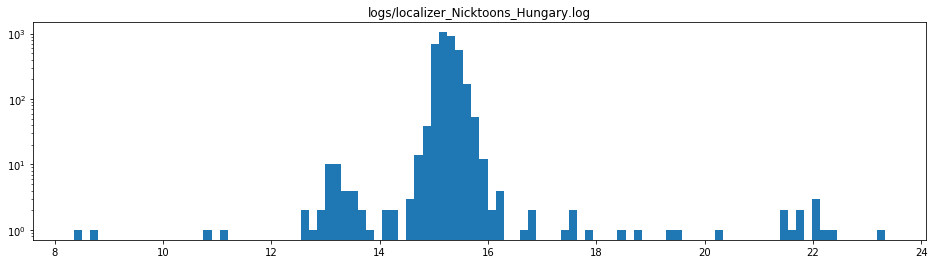

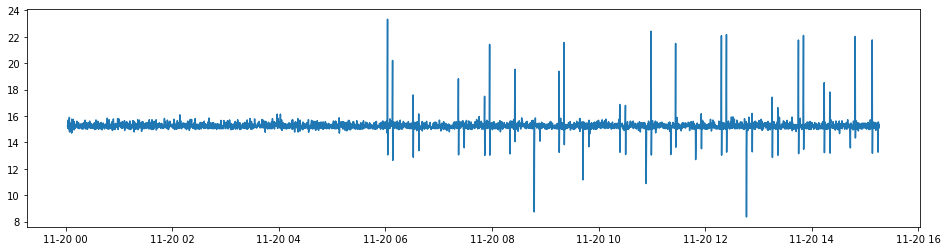

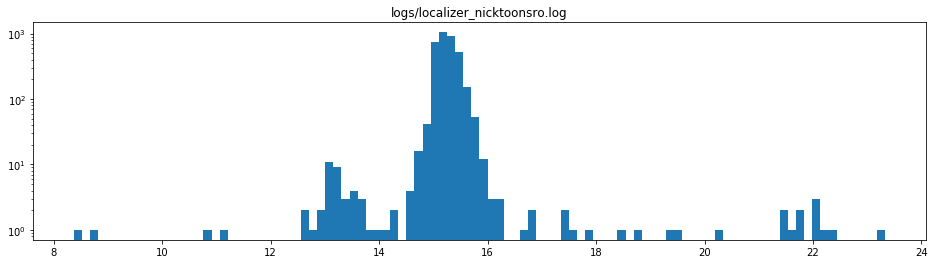

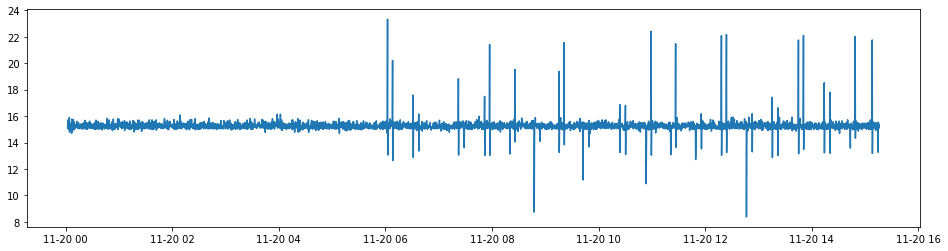

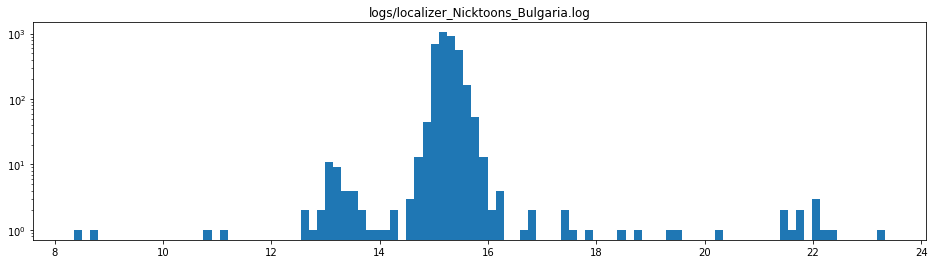

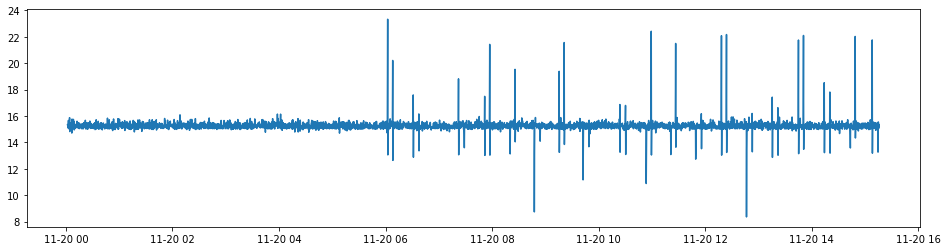

In [10]:
import re
import datetime
from matplotlib import pyplot
import sys,os

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from webapp.config import Config

regex_new_segment=r"([\S\s]*) - New segment detected:"

for c in Config.LOCALIZED_FEEDS:
    prev_detection=None
    filename="logs/localizer_"+c["log"]+".log"
    if os.path.exists(filename):
        with open(filename) as f:
            gaps={}
            for l in f:
                match=re.search(regex_new_segment,l)
                if match:
                    if prev_detection:
                        gaps[datetime.datetime.strptime(match.group(1),"%Y-%m-%d %H:%M:%S,%f")]=(datetime.datetime.strptime(match.group(1),"%Y-%m-%d %H:%M:%S,%f")-prev_detection).total_seconds()
                    prev_detection=datetime.datetime.strptime(match.group(1),"%Y-%m-%d %H:%M:%S,%f")

        pyplot.figure(figsize=(16,4))
        pyplot.hist(list(gaps.values()) ,bins=100)
        pyplot.yscale('log')
        pyplot.title(filename)

        pyplot.figure(figsize=(16,4))
        pyplot.plot(list(gaps.keys()),list(gaps.values()))
